In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy import linspace, polyfit, poly1d
import seaborn as sns

In [5]:
file_path = 'data/IgG Vtag 1_ACQUITY FLR ChA.txt'
data = pd.read_csv(file_path, skiprows=42, delimiter='\t', usecols=["Time (min)", "Value (EU)"])
data.head()

,Time (min),Value (EU)
0,0.000000,0.000000
1,0.008333,-0.000477
2,0.016667,-0.001914
3,0.025000,-0.004258
4,0.033333,-0.007188


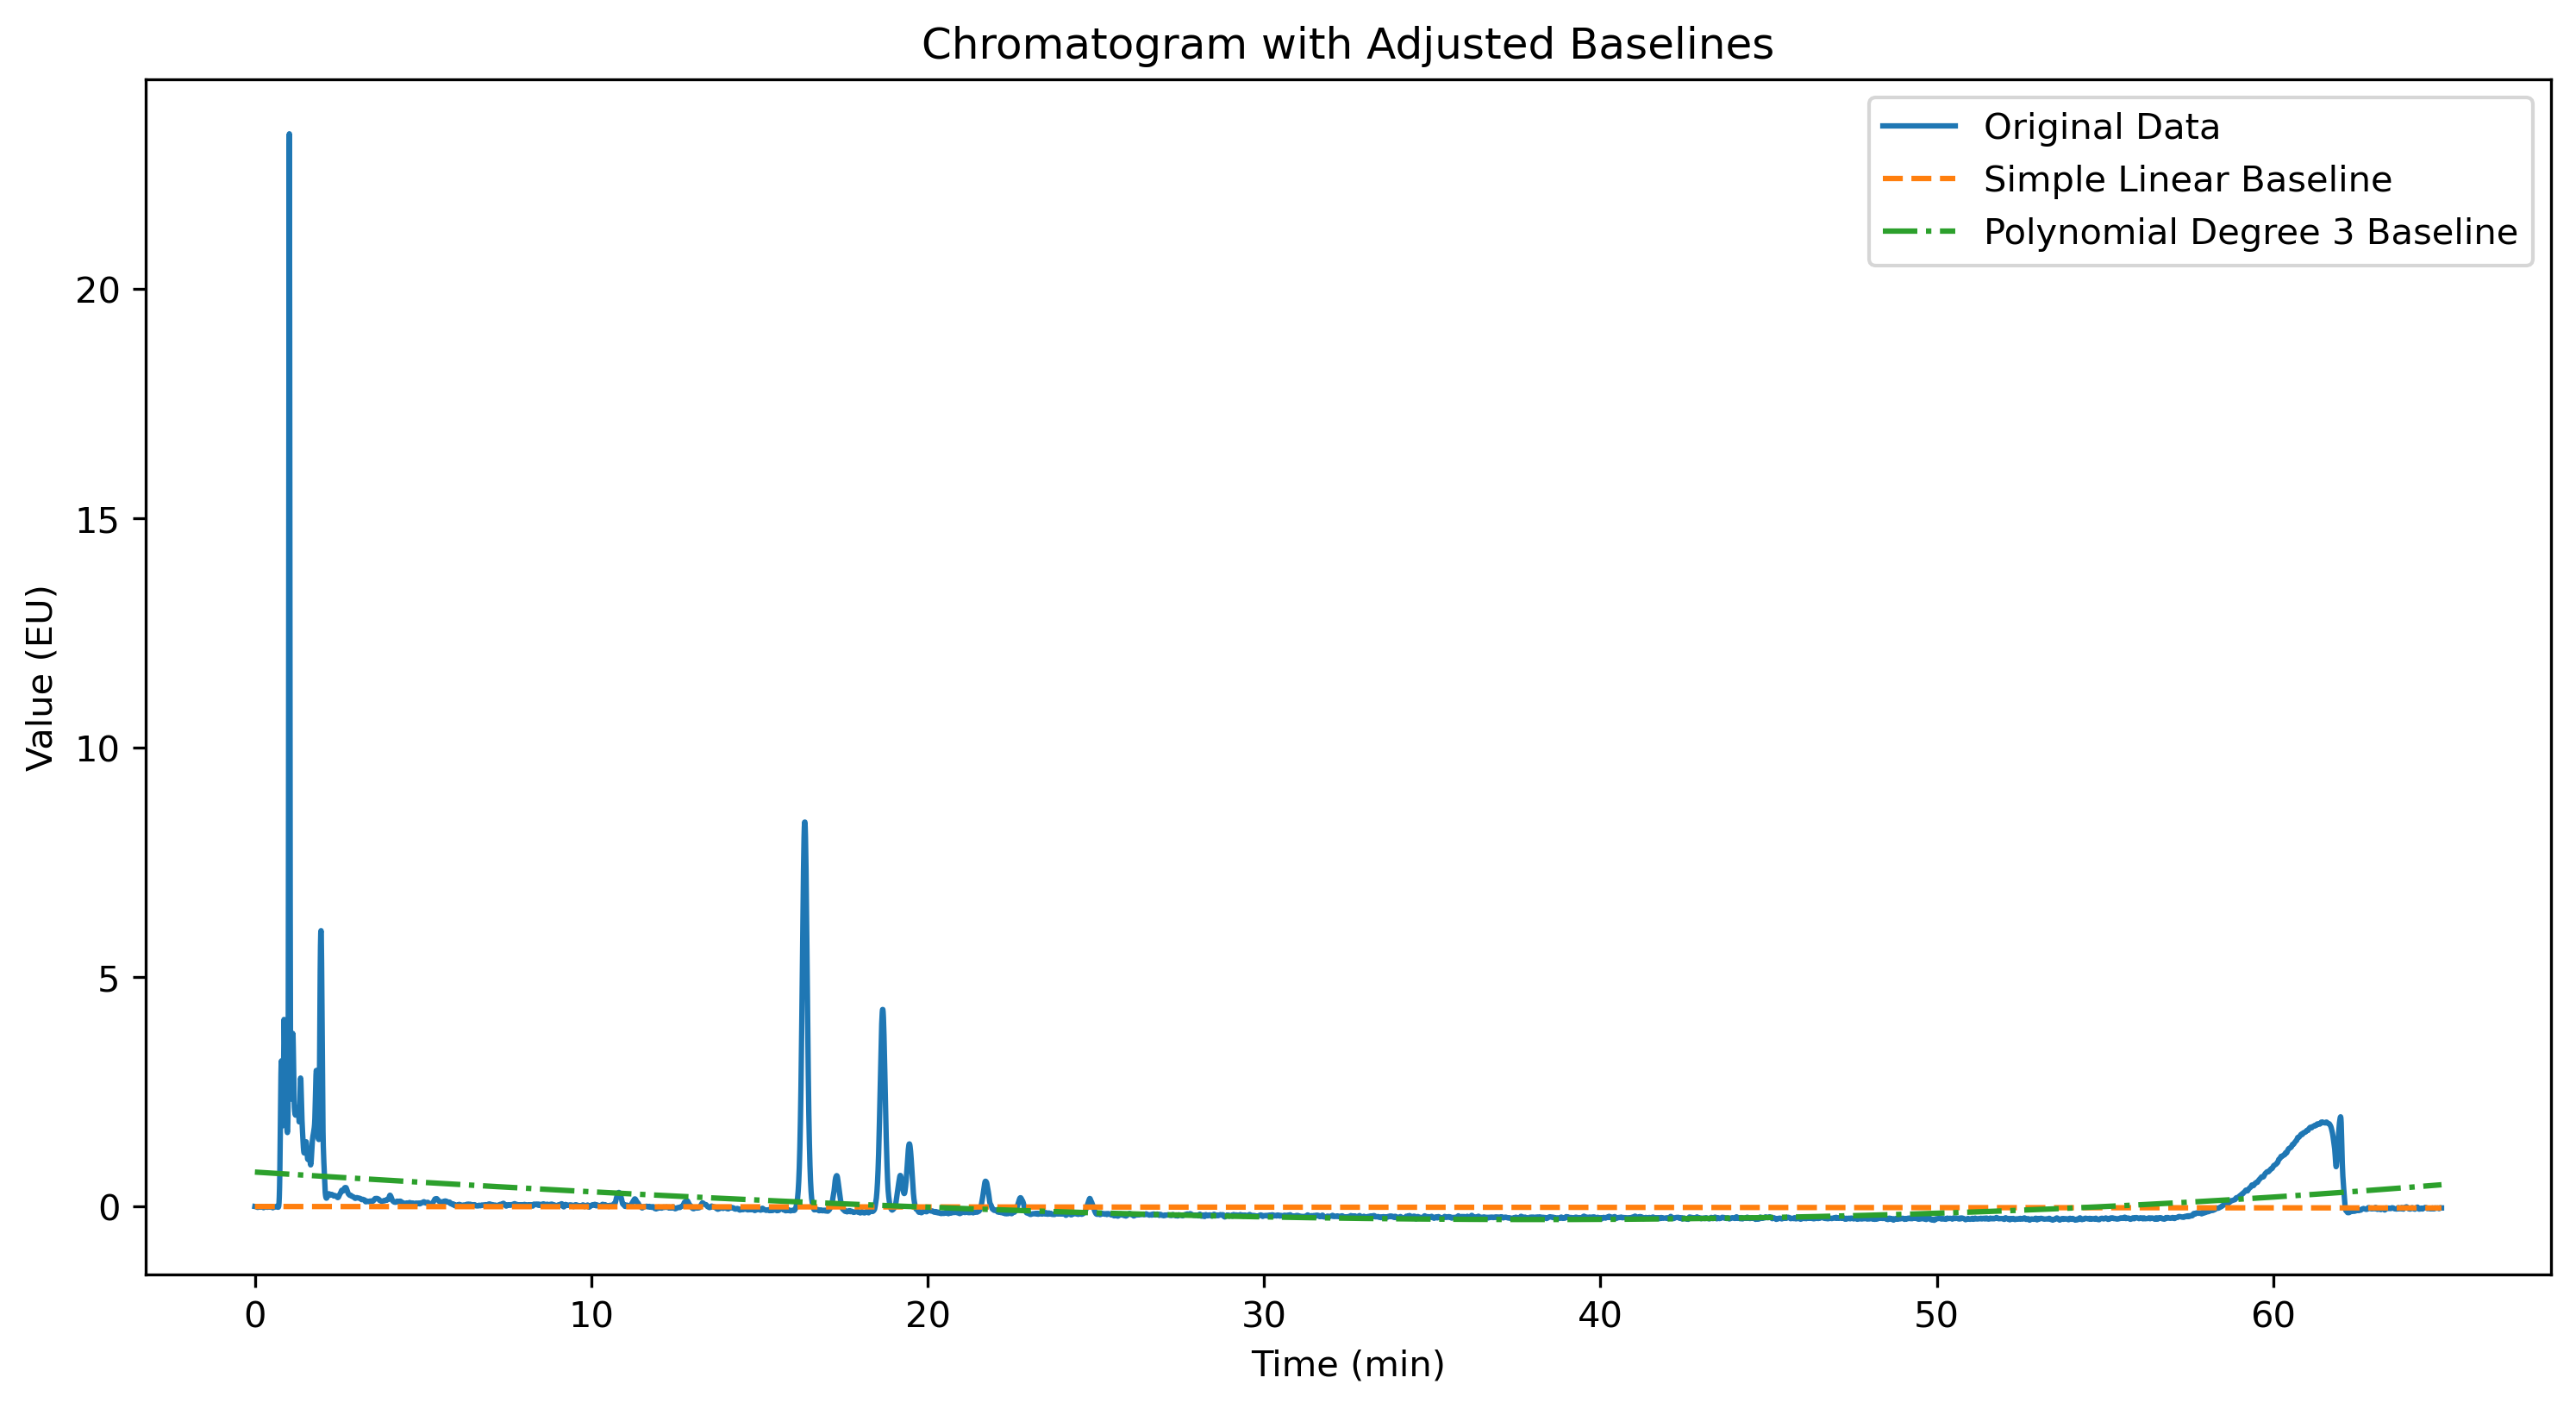

In [25]:
x = data['Time (min)']
y = data['Value (EU)']
x0 = [x.iloc[0], x.iloc[-1]]
y0 = [y.iloc[0], y.iloc[-1]]

# Lower degree polynomial fitting baseline
degree = 3
x_poly = linspace(x.min(), x.max(), num=len(x))
coeffs = polyfit(x, y, degree)
poly_func = poly1d(coeffs)
y_poly = poly_func(x_poly)

# Plotting the original data and the adjusted baselines
plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(x=x, y=y, label='Original Data', linestyle='-', marker='')
plt.plot(x0, y0, label='Simple Linear Baseline', linestyle='--')
plt.plot(x_poly, y_poly, label='Polynomial Degree 3 Baseline', linestyle='-.')
plt.title('Chromatogram with Adjusted Baselines')
plt.xlabel('Time (min)')
plt.ylabel('Value (EU)')
plt.legend()
plt.show()